(348, 348, 3)


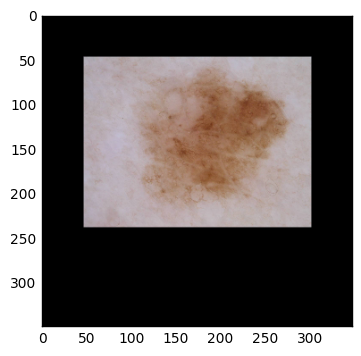

In [12]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
from skimage.transform import resize

%matplotlib inline

random_state = 31418
border = 46
out_dir = './out_unet'
test_dir = './out_test'

#img_name = '../../ISIC-2017_Training_Data/ISIC_0003056.jpg'
img_name = '../../ISIC-2017_Training_Data/ISIC_0000056.jpg'
#img_name = '../../ISIC-2017_Training_Data/ISIC_0013341.jpg'

def load_img(img_name, size, border_size):
    orig_img = imread(img_name)
    out_size = size + 2*border_size
    if len(orig_img.shape) > 2:
        img_small = np.zeros((out_size,out_size, orig_img.shape[2]), dtype=np.uint8)
    else:
        img_small = np.zeros((out_size,out_size), dtype=np.uint8)
    
    scale =  float(size)/np.max((orig_img.shape[0], orig_img.shape[1]))
    
    resize_v = int(round(scale * orig_img.shape[0]))
    resize_h = int(round(scale * orig_img.shape[1]))
    img_reshaped = resize(orig_img, (resize_v, resize_h), preserve_range=True).astype(np.uint8)
    img_small[border_size:resize_v+border_size, border_size:resize_h+border_size, ...] = img_reshaped
    return img_small

img_small = load_img(img_name, 256, border)
print img_small.shape
plt.imshow(img_small)

In [2]:
from scipy import ndimage
from skimage.filters.rank import median
from skimage.morphology import disk, black_tophat

def hair_removal(I):
    mask = disk(30)
    img_blurry = I.copy()
    img_blurry[:,:,0] = median(I[:,:,0], mask)
    img_blurry[:,:,1] = median(I[:,:,1], mask)
    img_blurry[:,:,2] = median(I[:,:,2], mask)

    selem = disk(10)
    closed = black_tophat(np.mean(I,2),  selem)

    img_nohair = I.copy()
    val = 40
    img_nohair[closed>val] = img_blurry[closed>val]
    return img_nohair

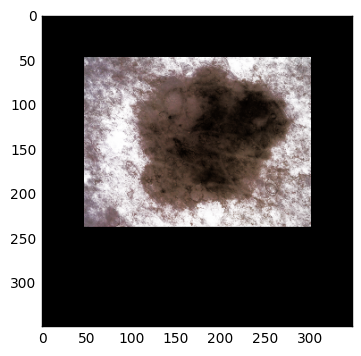

In [31]:
import cv2
from skimage.color import convert_colorspace
from skimage.exposure import equalize_hist

def hist_eq(I):
    img = I
    img_color = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # equalize the histogram of the Y channel
    img_color[:,:,1] = cv2.equalizeHist(img_color[:,:,1])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_color, cv2.COLOR_HLS2RGB)

    return img_output.astype('uint8')

a = hist_eq(img_small)
plt.imshow(a)

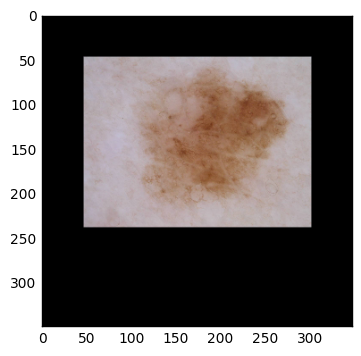

In [34]:
plt.imshow(img_small)

In [45]:
import glob, re, os, warnings
from skimage.io import imsave

start_at = 0
end_at = 0

if not os.path.exists(out_dir):
    os.makedirs(out_dir)


num_processed = 0
for file_name in sorted(glob.glob('../../ISIC-2017_Training_Data/*.jpg')):
    if num_processed < start_at:
        num_processed += 1
        continue
        
    img_name = re.match(r'.*/(ISIC_\d+)\.jpg', file_name).group(1)
    print ("%s: %d/%d" % (img_name, num_processed, 2000))

    img_small = load_img(file_name, 256, border)
    #img = hair_removal(img_small)
    img_eq = hist_eq(img_small)
    
    imsave(('%s/%s_img.tif' % (out_dir, img_name)), img_small)
    imsave(('%s/%s_histeq.tif' % (out_dir, img_name)), img_eq)
    
    num_processed += 1
    
    if num_processed > end_at:
        break

ISIC_0000000: 0/2000
uint8


In [36]:
import glob, re, os, warnings
from skimage.io import imsave

start_at = 0
end_at = 2000

if not os.path.exists(out_dir):
    os.makedirs(out_dir)


num_processed = 0
for file_name in sorted(glob.glob('../../ISIC-2017_Training_Part1_GroundTruth/*.png')):
    if num_processed < start_at:
        num_processed += 1
        continue
        
    img_name = re.match(r'.*/(ISIC_\d+)_segmentation\.png', file_name).group(1)
    print ("%s: %d/%d" % (img_name, num_processed, 2000))

    img_small = load_img(file_name, 256, border)
    
    imsave(('%s/%s_segmentation.tif' % (out_dir, img_name)), img_small)
    
    num_processed += 1
    
    if num_processed > end_at:
        break

ISIC_0000000: 0/2000
ISIC_0000001: 1/2000
ISIC_0000002: 2/2000
ISIC_0000003: 3/2000
ISIC_0000004: 4/2000
ISIC_0000006: 5/2000
ISIC_0000007: 6/2000
ISIC_0000008: 7/2000
ISIC_0000009: 8/2000
ISIC_0000010: 9/2000
ISIC_0000011: 10/2000
ISIC_0000012: 11/2000
ISIC_0000013: 12/2000
ISIC_0000014: 13/2000
ISIC_0000015: 14/2000
ISIC_0000016: 15/2000
ISIC_0000017: 16/2000
ISIC_0000018: 17/2000
ISIC_0000019: 18/2000
ISIC_0000020: 19/2000
ISIC_0000021: 20/2000
ISIC_0000022: 21/2000
ISIC_0000023: 22/2000
ISIC_0000024: 23/2000
ISIC_0000025: 24/2000
ISIC_0000026: 25/2000
ISIC_0000027: 26/2000
ISIC_0000028: 27/2000
ISIC_0000029: 28/2000
ISIC_0000030: 29/2000
ISIC_0000031: 30/2000
ISIC_0000032: 31/2000
ISIC_0000034: 32/2000
ISIC_0000035: 33/2000
ISIC_0000036: 34/2000
ISIC_0000037: 35/2000
ISIC_0000038: 36/2000
ISIC_0000039: 37/2000
ISIC_0000040: 38/2000
ISIC_0000041: 39/2000
ISIC_0000042: 40/2000
ISIC_0000043: 41/2000
ISIC_0000044: 42/2000
ISIC_0000045: 43/2000
ISIC_0000046: 44/2000
ISIC_0000047: 45/200

In [37]:
import glob, re, os, warnings
from skimage.io import imsave
from shutil import copyfile
from sklearn.model_selection import train_test_split

files = glob.glob('%s/*_img.tif' % out_dir)
if not os.path.exists(test_dir):
        os.makedirs(test_dir)
        
for test_set in range(5):
    X_tr, X_ts = train_test_split(files, train_size = 0.9, random_state=(random_state+test_set))
    
    test_train_dir = ('%s/train%d' % (test_dir, test_set))
    test_test_dir = ('%s/test%d' % (test_dir, test_set))
    if not os.path.exists(test_train_dir):
        os.makedirs(test_train_dir)
    
    if not os.path.exists(test_test_dir):
        os.makedirs(test_test_dir)
    
    num_processed = 0
    for file_name in sorted(files):
        if num_processed < start_at:
            num_processed += 1
            continue

        img_name = re.match(r'.*/(ISIC_\d+)_img\.tif', file_name).group(1)
        is_test = False
        src = '%s/%s' % (out_dir, img_name)
        dst = '%s/%s' % (test_train_dir, img_name)
        if file_name in X_ts:
            is_test = True
            dst = '%s/%s' % (test_test_dir, img_name)
            
        print ("%s: %d/%d (is_train: %r) set %d" % (img_name, num_processed, 2000, is_test, test_set))

        copyfile(src + '_img.tif', dst + '_img.tif')
        copyfile(src + '_segmentation.tif', dst + '_segmentation.tif')
        copyfile(src + '_histeq.tif', dst + '_histeq.tif')

        num_processed += 1

        if num_processed > end_at:
            break

ISIC_0000000: 0/2000 (is_train: False) set 0
ISIC_0000001: 1/2000 (is_train: False) set 0
ISIC_0000002: 2/2000 (is_train: False) set 0
ISIC_0000003: 3/2000 (is_train: False) set 0
ISIC_0000004: 4/2000 (is_train: False) set 0
ISIC_0000006: 5/2000 (is_train: False) set 0
ISIC_0000007: 6/2000 (is_train: False) set 0
ISIC_0000008: 7/2000 (is_train: False) set 0
ISIC_0000009: 8/2000 (is_train: False) set 0
ISIC_0000010: 9/2000 (is_train: False) set 0
ISIC_0000011: 10/2000 (is_train: False) set 0
ISIC_0000012: 11/2000 (is_train: False) set 0
ISIC_0000013: 12/2000 (is_train: False) set 0
ISIC_0000014: 13/2000 (is_train: False) set 0
ISIC_0000015: 14/2000 (is_train: False) set 0
ISIC_0000016: 15/2000 (is_train: False) set 0
ISIC_0000017: 16/2000 (is_train: False) set 0
ISIC_0000018: 17/2000 (is_train: True) set 0
ISIC_0000019: 18/2000 (is_train: False) set 0
ISIC_0000020: 19/2000 (is_train: False) set 0
ISIC_0000021: 20/2000 (is_train: False) set 0
ISIC_0000022: 21/2000 (is_train: False) set 0